<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/Iterations_DeepLearning_2_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Import the necessary packages
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Load or input the dataset
#Here hard coded dataset is entered .
#Input X is a 2x3 matrix with 3 samples and each sample has 2 features
#Correspoding to three samples, there are three output.
#Together they are representd by Y

X=np.array([[0.5, 0.7, 0.6],[0.75,0.25,0.6]])
Y=np.array([[1,0,1]])

#We take the count of number of samples in variable m
m=Y.shape[1]

#learning rate is stored in variable alpha
alpha=0.01

#No of iterations for which we want to run the froward and backward propagation 
#in a loop is stored in variable iterNo

iterNo= int(input("Enter no of iterations: "))

Enter no of iterations: 10


In [4]:
#To ascetain the shape of X and Y
print("Shape of inpur matrix X is: ",X.shape)
print("Shape of inpur matrix Y is: ",Y.shape)
print("No of training samples is: ",m)

Shape of inpur matrix X is:  (2, 3)
Shape of inpur matrix Y is:  (1, 3)
No of training samples is:  3


In [5]:
#Function to ascertain the number of nodes in input layer, output layer and hidden layer
def layer_sizes(X, Y):
  
    n_x= X.shape[0] #the size of the input layer
    n_h=4 #the size of the hidden layer
    n_y=Y.shape[0] #the size of the output layer
    
    return (n_x, n_h, n_y)

In [6]:
#check the layer_sizes function
n_x,n_h,n_y= layer_sizes(X,Y)
print(n_x,n_h,n_y)

2 4 1


In [8]:
#Function to initialize parameters W and b. Function will return the values of W and b
def initialize_parameters(n_x, n_h, n_y):
    """
    These four lines of the code can be used to generate random matrix for 
    W1 and W2

    W1= np.random.randn(n_h,n_x)*0.01 #weight matrix of shape (n_h, n_x)
    W2=np.random.randn(n_y,n_h)*0.01 #weight matrix of shape (n_y, n_h)
    b1= np.zeros(shape=(n_h,1)) #bias vector of shape (n_h, 1)
    b2= np.zeros(shape=(n_y,1)) #bias vector of shape (n_y, 1)
    """

    #For this implementation we are taking hardcoded values for the first iteration

    W1= np.array([[0.0065,0.007343],[0.005811,0.0057],[0.008029,0.006126],[0.001196,0.00682]])
    W2=np.array([[0.0072,0.000154,0.007631,0.005249]])
    b1= np.zeros(shape=(n_h,1))
    b2= np.zeros(shape=(n_y,1))
    return W1,W2,b1,b2
   

W2

image.png

W1

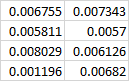

In [12]:
#Check initialize_parameter function

W1,W2,b1,b2=initialize_parameters(n_x, n_h, n_y)
print("Intial value of matrix W1 is\n", W1)
print("\n Intial value of matrix W2 is\n",W2)
print("\n Intial value of matrix b1 is\n",b1)
print("\nIntial value of matrix b1 is\n",b2)

Intial value of matrix W1 is
 [[0.0065   0.007343]
 [0.005811 0.0057  ]
 [0.008029 0.006126]
 [0.001196 0.00682 ]]

 Intial value of matrix W2 is
 [[0.0072   0.000154 0.007631 0.005249]]

 Intial value of matrix b1 is
 [[0.]
 [0.]
 [0.]
 [0.]]

Intial value of matrix b1 is
 [[0.]]


Forward Propagation

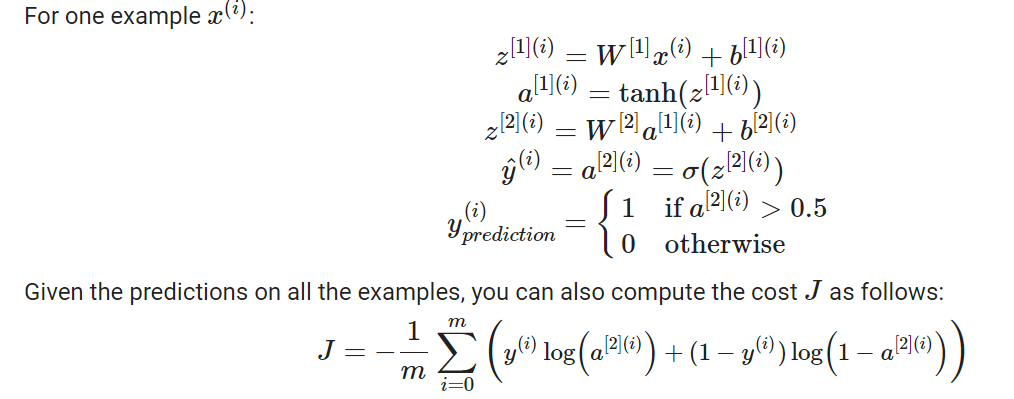

In [13]:
#Function to implement forward_propagation
#this function will obtain the values of Z1, A1, Z2 A2 and cost
def forward_propagation(X,W1,W2,b1,b2):
    Z1= np.dot(W1,X)+b1
    A1= np.tanh(Z1) #Using tanh function for the middle layer
    Z2= np.dot(W2,A1)+b2
    A2= 1/(1+np.exp(-Z2)) #Using sigmoid function for the last layer
    
    return Z1,A1,Z2,A2

In [17]:
#To check forward_propagation function

Z1,A1,Z2,A2=forward_propagation(X,W1,W2,b1,b2)
print(Z1)
print(A1)
print(Z2)
print(A2)

[[0.00875725 0.00638575 0.0083058 ]
 [0.0071805  0.0054927  0.0069066 ]
 [0.008609   0.0071518  0.008493  ]
 [0.005713   0.0025422  0.0048096 ]]
[[0.00875703 0.00638566 0.00830561]
 [0.00718038 0.00549264 0.00690649]
 [0.00860879 0.00715168 0.0084928 ]
 [0.00571294 0.00254219 0.00480956]]
[[0.00015984 0.00011474 0.00015092]]
[[0.50003996 0.50002869 0.50003773]]


In [18]:
#Function to compute cost function
def compute_cost(A2, Y, m):
    logJ= np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    J=-1/m*np.sum(logJ)
    
    return J

In [19]:
#To check compute_cost fucntion
J= compute_cost(A2,Y,m)
print(J)

0.6931145141118211


Backward Propagation


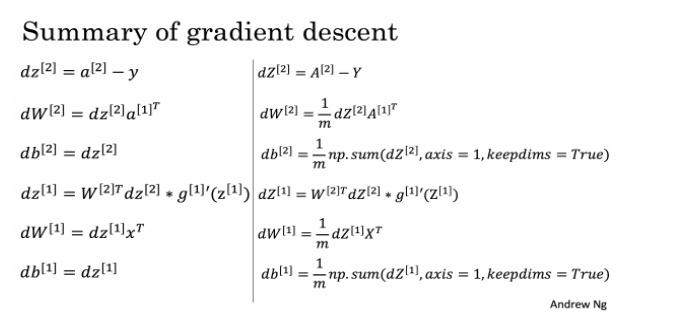

In [20]:
#Function to implement backward propoagation
#This function will return dZ2, dW2,dB2,dZ1, dW1, db1,db2

def backward_propagation(W1,W2,A1,A2,Y,m,X):
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dZ2,dW2,db2,dZ1,dW1,db1,db2

In [24]:
#To check backward_propagation function 
dZ2,dW2,db2,dZ1,dW1,db1,db2=backward_propagation(W1,W2,A1,A2,Y,m,X)
print(dZ2)
print(dW2)
print(db2)
print(dZ1)
print(dW1)
print(db1)

[[-0.49996004  0.50002869 -0.49996227]]
[[-0.00177921 -0.00143214 -0.00165803 -0.00132989]]
[[-0.16663121]]
[[-3.59943625e-03  3.60005973e-03 -3.59948003e-03]
 [-7.69898766e-05  7.70020944e-05 -7.69905171e-05]
 [-3.81491232e-03  3.81552374e-03 -3.81493690e-03]
 [-2.62420460e-03  2.62463361e-03 -2.62424125e-03]]
[[-4.79788110e-04 -1.31975009e-03]
 [-1.02625942e-05 -2.82287314e-05]
 [-5.08517229e-04 -1.39875515e-03]
 [-3.49801176e-04 -9.62179934e-04]]
[[-1.19961885e-03]
 [-2.56594331e-05]
 [-1.27144183e-03]
 [-8.74604083e-04]]


In [26]:
#Function to update the parameter W and b values
#This function will return upadted values of W1, W2, b1, b2
def update_parameters(W1,W2,b1,b2,dW1,dW2, db2):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [27]:
#To check update_parameters function
W1,b1,W2,b2=update_parameters(W1,W2,b1,b2,dW1,dW2, db2)
print(W1)
print(b1)
print(W2)
print(b2)

[[0.0065048  0.0073562 ]
 [0.0058111  0.00570028]
 [0.00803409 0.00613999]
 [0.0011995  0.00682962]]
[[1.19961885e-05]
 [2.56594331e-07]
 [1.27144183e-05]
 [8.74604083e-06]]
[[0.00721779 0.00016832 0.00764758 0.0052623 ]]
[[0.00166631]]


Single function to call all above functions and run it for the required number of iterations


In [57]:
#This single function will call all the functions and retrun the cost function values
#and the final value of the W and b parameters
def iterations(X,Y,iterNo):
  J=np.zeros(iterNo)
  n_x,n_h,n_y= layer_sizes(X,Y)
  W1,W2,b1,b2=initialize_parameters(n_x, n_h, n_y)
 
  for i in range(iterNo):

    Z1,A1,Z2,A2=forward_propagation(X,W1,W2,b1,b2)
    cost=compute_cost(A2,Y,m)
    J[i]=cost
    dZ2,dW2,db2,dZ1,dW1,db1,db2=backward_propagation(W1,W2,A1,A2,Y,m,X)
    W1,b1,W2,b2=update_parameters(W1,W2,b1,b2,dW1,dW2, db2)
  return W1,b1,W2,b2,J
  

In [56]:
#Enter the number of iterations for which we want to run the loop for forward and
#backward propagation
iterNo=int(input("Enter the number of iterations: "))

Enter the number of iterations: 1000


In [58]:
W1, b1,W2,b2,J= iterations(X,Y,iterNo)
print("The cost for {} iterations is \n {}".format(iterNo, J))
print("\nFinal updated value of W1 matrix is \n", W1)
print("\nFinal updated value of b1 matrix is \n", b1)
print("\nFinal updated value of W2 matrix is \n", W2)
print("\nFinal updated value of b2 matrix is \n", b2)

The cost for 1000 iterations is 
 [0.69311451 0.69283701 0.6925609  0.69228616 0.6920128  0.6917408
 0.69147015 0.69120086 0.69093292 0.69066631 0.69040103 0.69013707
 0.68987444 0.68961311 0.68935309 0.68909437 0.68883694 0.68858079
 0.68832592 0.68807233 0.68781999 0.68756892 0.6873191  0.68707053
 0.6868232  0.68657711 0.68633224 0.68608859 0.68584616 0.68560494
 0.68536492 0.6851261  0.68488847 0.68465203 0.68441676 0.68418267
 0.68394975 0.68371799 0.68348738 0.68325793 0.68302962 0.68280244
 0.6825764  0.68235149 0.6821277  0.68190503 0.68168346 0.681463
 0.68124364 0.68102537 0.68080819 0.6805921  0.68037708 0.68016313
 0.67995024 0.67973842 0.67952766 0.67931794 0.67910927 0.67890164
 0.67869504 0.67848947 0.67828492 0.6780814  0.67787889 0.67767738
 0.67747688 0.67727738 0.67707887 0.67688135 0.67668481 0.67648925
 0.67629466 0.67610104 0.67590839 0.67571669 0.67552595 0.67533616
 0.67514731 0.6749594  0.67477242 0.67458638 0.67440126 0.67421706
 0.67403377 0.6738514  0.673669

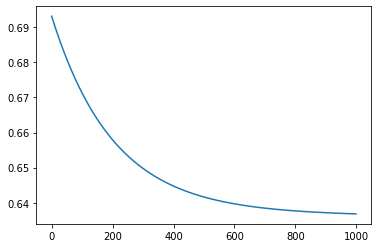

In [59]:
#Plot the cost function
plt.plot(J)